# Un día con el lenguaje de programación Julia

# Julia

**Julia** es un lenguaje de alto nivel, como **R** o **Python**, que permite escribir código de manera fácil y rápida, pero con una velocidad de ejecución similar a la de **C**, **C++** o **Fortran** *(~ 2x)*

In [1]:
println("Hola mundo")

Hola mundo


In [6]:
; cat data/benchmark.csv

Benchmark;Fortran;Julia;Python;R;Matlab;Octave;Mathematica;JavaScript;Go;LuaJIT;Java
fib;0.70;2.11;77.76;533.52;26.89;9324.35;118.53;3.36;1.86;1.71;1.21
parse_int;5.05;1.45;17.02;45.73;802.52;9581.44;15.02;6.06;1.20;5.77;3.35
quicksort;1.31;1.15;32.89;264.54;4.92;1866.01;43.23;2.70;1.29;2.03;2.60
mandel;0.81;0.79;15.32;53.16;7.58;451.81;5.13;0.66;1.11;0.67;1.35
pi_sum;1.00;1.00;21.99;9.56;1.00;299.31;1.69;1.01;1.00;1.00;1.00
rand_mat_stat;1.45;1.66;17.93;14.56;14.52;30.93;5.95;2.30;2.96;3.27;3.92
rand_mat_mul;3.48;1.02;1.14;1.57;1.12;1.12;1.30;15.07;1.42;1.16;2.36


In [7]:
using DataFrames
benchmark = readtable("data/benchmark.csv", separator=';')

,Benchmark,Fortran,Julia,Python,R,Matlab,Octave,Mathematica,JavaScript,Go,LuaJIT,Java
1,fib,0.7,2.11,77.76,533.52,26.89,9324.35,118.53,3.36,1.86,1.71,1.21
2,parse_int,5.05,1.45,17.02,45.73,802.52,9581.44,15.02,6.06,1.2,5.77,3.35
3,quicksort,1.31,1.15,32.89,264.54,4.92,1866.01,43.23,2.7,1.29,2.03,2.6
4,mandel,0.81,0.79,15.32,53.16,7.58,451.81,5.13,0.66,1.11,0.67,1.35
5,pi_sum,1.0,1.0,21.99,9.56,1.0,299.31,1.69,1.01,1.0,1.0,1.0
6,rand_mat_stat,1.45,1.66,17.93,14.56,14.52,30.93,5.95,2.3,2.96,3.27,3.92
7,rand_mat_mul,3.48,1.02,1.14,1.57,1.12,1.12,1.3,15.07,1.42,1.16,2.36



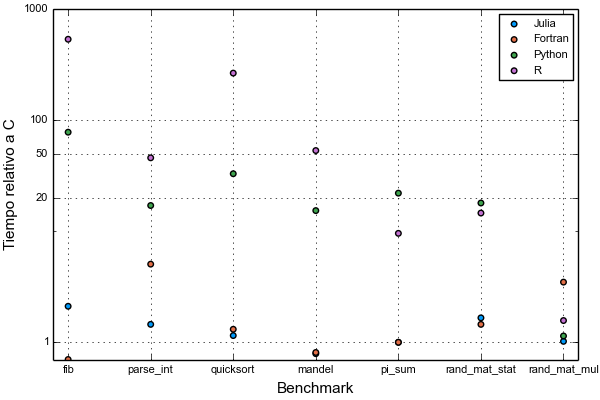

In [22]:
using Plots, StatPlots
scatter(benchmark, :Benchmark, [:Julia, :Fortran, :Python, :R], 
    yscale=:log10, 
    ylab="Tiempo relativo a C", 
    yticks=([1,20,50,100,1000],["1","20","50","100","1000"]))

# Julia fue diseñado para ser rápido 

Julia fue diseñado desde su creación para ser un lenguaje de programación compilado en tiempo real (JIT por *just-in-time*).

- No es necesario recurrir a código en C para obtener velocidad.

- Los tipos de datos y métodos/funciones definidos por el usuario son tan rápidos como los que vienen en la biblioteca estándar. De hecho… La biblioteca estándar de Julia está escrita en Julia (es un lenguaje homoicónicos).

El secreto de Julia es que compila cada función de la manera más eficiente y específica para cada tipo de dato sobre la cual se usa o se define.  

Cuando más de un método existe con el mismo nombre, Julia elige el método más específico para el tipo de sus argumentos, debido a su diseño basado en *multiple dispatch*.  

La primera vez que se llama a una función, su tiempo de ejecución es más lento porque incluye el tiempo de compilación. Pero la segunda vez que se ejecuta, es casi tan rápida como si corriera en C (dado que ya fue compilada específicamente para el tipo de datos de sus argumentos)

In [23]:
@time sum(rand(100))

  0.065439 seconds (41.22 k allocations: 1.725 MB)


51.38055110002102

In [24]:
@time sum(rand(100))

  0.000004 seconds (7 allocations: 1.063 KB)


45.77580229313082

# Tipos de datos elementales

Julia posee varios [tipos de datos elementales](https://es.wikipedia.org/wiki/Tipo_de_dato_elemental), los más usados son:

In [25]:
for valor in [42, 1.0, true, 'A', "A", (true, false)]
    dump(valor) #
end

Int64 42
Float64 1.0
Bool true
Char A
String "A"
Tuple{Bool,Bool}
  1: Bool true
  2: Bool false


# Arrays

En Julia los arrays son tipos de datos paramétricos, definidos por el tipo de datos que contienen y su dimensión. Por ejemplo una lista de Python sería un array unidimensional que contiene cualquier tipo de datos: `Array{Any,1}`

In [27]:
lista = [1, π, "Hola mundo"]

3-element Array{Any,1}:
  1                    
 π = 3.1415926535897...
   "Hola mundo"        

In [28]:
typeof(lista)

Array{Any,1}

Si un array contiene siempre un mismo tipo de datos, su almacenamiento en memoria es más eficiente si lo declaramos. A su vez las funciones que lo utilizan se ejecutarán de manera más eficiente/rápida (porque el compilador puede predecir el tipo de datos que va a obtener de array).

In [29]:
[62, 95, 99, 30]

4-element Array{Int64,1}:
 62
 95
 99
 30

In [30]:
identidad = Float64[62, 95, 99, 30]

4-element Array{Float64,1}:
 62.0
 95.0
 99.0
 30.0

In [31]:
identidad[1] # Los Arrays se acceden desde 1

62.0

In [32]:
identidad[2:3] # Es posible acceder usando rangos start:end

2-element Array{Float64,1}:
 95.0
 99.0

In [33]:
identidad[end] = 100 # Es posible asignar un elemento a un índice en particular, "end" permite obtener el último ítem
identidad

4-element Array{Float64,1}:
  62.0
  95.0
  99.0
 100.0

Es posible indexar un array usando otro array, por ejemplo usando arrays lógicos

In [34]:
usar = identidad .> 95.0 # .> compara el array elemento a elemento

4-element BitArray{1}:
 false
 false
  true
  true

In [35]:
identidad[ usar ]

2-element Array{Float64,1}:
  99.0
 100.0

Existen varias *dequeue functions* en Julia. Dado que modifican el array que reciben, por convención sus nombres terminan en `!`, por ejemplo:
```
push! # Al final del array
pop!

shift! # Al inicio del array
unshift!

splice! # Toma un valor dentro del array
```

In [36]:
push!(identidad, 30)
identidad

5-element Array{Float64,1}:
  62.0
  95.0
  99.0
 100.0
  30.0

## Arrays multidimensionales

In [37]:
matrix = [ 0.5 0.6 
           0.7 0.8 ]

2×2 Array{Float64,2}:
 0.5  0.6
 0.7  0.8

In [38]:
matrix[2,1] # Fila 2, Columna 1

0.7

In [39]:
matrix[3] # La matriz se almacena de manera continua en memoria; column-major order.

0.6

# Dicts

**Dict** es a **Julia** lo que un hash es a *Perl* o un *dict* a *Python*. Una manera de almacenar datos asociados. `Dict` es también un tipo de dato paramétrico determinado por el tipo de sus llaves (`keys`) y valores (`values`).

In [40]:
dict = Dict('A'=>1, 'B'=>2)

Dict{Char,Int64} with 2 entries:
  'A' => 1
  'B' => 2

In [41]:
dict['A'] # Accede al valor de la llave 'A'

1

In [42]:
dict['C'] = 30 # Agrega un nuevo par (Pair) llave => valor al diccionario
dict['A'] = 10 # Si la llave ya existe, el valor es reemplazado
dict

Dict{Char,Int64} with 3 entries:
  'A' => 10
  'B' => 2
  'C' => 30

In [43]:
dict['D'] # Error: 'D' no está en map

LoadError: KeyError: key 'D' not found

In [44]:
get(dict, 'D', 0) # Es posible usar get para definir un valor default que evite el error

0

In [45]:
dict

Dict{Char,Int64} with 3 entries:
  'A' => 10
  'B' => 2
  'C' => 30

In [46]:
get!(dict, 'D', 0) # gest! es como get, pero agrega el valor si no se encuentra la llave
dict

Dict{Char,Int64} with 4 entries:
  'A' => 10
  'B' => 2
  'C' => 30
  'D' => 0

Control de flujo
================

### If

Evaluación condicional

In [47]:
identidad = rand() * 100.0

73.05181039527461

In [48]:
if identidad == 100.0
    println("Idénticas")
elseif identidad >= 30 # Opcional
    println("Homólogas")
else  # Opcional
    println("Twilight")
end

Homólogas


## Loops

In [49]:
carpeta = "data"
archivos = readdir(carpeta)

7-element Array{String,1}:
 "benchmark.csv"         
 "Empty.fasta"           
 "iris.csv"              
 "out.fas"               
 "PF09645_full.fasta"    
 "PF09645_full.stockholm"
 "py_out.fas"            

In [50]:
i = 1
while i <= length(archivos)
    println(archivos[i])
    i += 1 # i = i + 1
end

benchmark.csv
Empty.fasta
iris.csv
out.fas
PF09645_full.fasta
PF09645_full.stockholm
py_out.fas


In [51]:
for archivo in archivos # for numero = numeros
    println(archivo)
end

benchmark.csv
Empty.fasta
iris.csv
out.fas
PF09645_full.fasta
PF09645_full.stockholm
py_out.fas


En Julia los `for`s son reescritos como `while`s, usando las funciones `start` para inicializar la iteración, `done` para testear si se alcanzó el final de la iteración y `next`para obtener el valor de la iteración y el del próximo estado. Uno puede definir estas funciones para cualquier tipo propio que quiera hacer iterable. 

In [52]:
state = start(archivos) # state = 1
while !done(archivos, state) # !( state > length(archivos) )
    (archivo, state) = next(archivos, state) # archivos[state], state + 1
    println(archivo)
end

benchmark.csv
Empty.fasta
iris.csv
out.fas
PF09645_full.fasta
PF09645_full.stockholm
py_out.fas


### *List comprehension* como en *Python*  

In [55]:
len = length(archivos) 
lista = Array(Int, len)

for i in 1:len
    lista[i] = filesize(joinpath(carpeta, archivos[i])) # Tamaño en bytes
end

lista

7-element Array{Int64,1}:
  571
    0
 4164
  555
  558
 1277
  559

In [56]:
lista = [ filesize(joinpath(carpeta, nombre)) for nombre in archivos ]

7-element Array{Int64,1}:
  571
    0
 4164
  555
  558
 1277
  559

In [57]:
lista = [ filesize(joinpath(carpeta, nombre)) for nombre in archivos if endswith(nombre,".fasta") ]

2-element Array{Int64,1}:
   0
 558

Strings
=======

Los *strings* son secuencias finitas de *caracteres*. En sus principios la *bioinformática* se trató del análisis de secuencias de caracteres (utilizando la codificación *ASCII* de *8 bits*), lo que hizo popular a **Perl** en el área.
**Julia**, al igual que Perl, tiene un buen soporte para *strings*:

In [58]:
cadena = "∃x ∈ B ∧ x ∈ A"

"∃x ∈ B ∧ x ∈ A"

In [59]:
typeof(cadena)

String

Es seguro iterar sobre un string (inmutable) para obtener sus caracteres. Si se quiere obtener un `Vector{Char}` (`Array` de una dimensión, mutable) se puede usar list comprehension o la función `collect`.

In [61]:
for char in cadena
    print(char)
end

∃x ∈ B ∧ x ∈ A

In [63]:
collect(cadena) # [ char for char in cadena ]

14-element Array{Char,1}:
 '∃'
 'x'
 ' '
 '∈'
 ' '
 'B'
 ' '
 '∧'
 ' '
 'x'
 ' '
 '∈'
 ' '
 'A'

Sin embargo, acceder directamente a un string como si fuera un array no es una acción segura dado que un carácter puede estar codificado por más de un valor de 8 bits. Sólo es seguro hacer eso si la codificación es ASCII, dado que cada carácter está codificado por un sólo número entero de 8 bits. Pero no es seguro hacerlo para otras codificación. Por ejemplo, la codificación *UTF-8* de ∃ (`\exists<tab>` en la consola) requiere de tres valores de 8 bits: 

In [65]:
isascii(cadena)

false

In [67]:
for i in 1:length(cadena)
    try
        println(i, " ", cadena[i])
    catch err
        println(i, " ", err) # Error al acceder cadena_unicode[i]
    end
end

1 ∃
2 UnicodeError: invalid character index
3 UnicodeError: invalid character index
4 x
5  
6 ∈
7 UnicodeError: invalid character index
8 UnicodeError: invalid character index
9  
10 B
11  
12 ∧
13 UnicodeError: invalid character index
14 UnicodeError: invalid character index


## Regex: Regular Expression

Las expresiones regulares de **Julia** se escriben igual a las de **Perl**, dado que Julia utiliza la biblioteca **PCRE2** (*Perl Compatible Regular Expressions*).

In [68]:
ext_fasta = r"\.fasta$" # r"... permite escribir una expresión regular

r"\.fasta$"

In [69]:
typeof(ext_fasta)

Regex

In [70]:
for nombre in archivos
    println(nombre, "\t:\t", ismatch(ext_fasta, nombre)) # ismatch es true si la regex está en el string
end

benchmark.csv	:	false
Empty.fasta	:	true
iris.csv	:	false
out.fas	:	false
PF09645_full.fasta	:	true
PF09645_full.stockholm	:	false
py_out.fas	:	false


In [71]:
ismatch(r"^>\w{4}\.\w", ">2trx.A")

true

### Capturando strings con expresiones regulares

In [72]:
captura = match(r"^>(\w{4})\.(\w)", ">2trx.A")

RegexMatch(">2trx.A", 1="2trx", 2="A")

In [73]:
if captura != nothing
    println("PDB\t", captura[1]) # captura[1] == captura.captures[1]
    println("Cadena\t", captura[2])
else
    println("No es un PDB ID")
end

PDB	2trx
Cadena	A


In [74]:
captura = match(r"^>(\w{4})\.(\w)", ">PF00085") # nothing no imprime nada en pantalla

In [75]:
if captura != nothing
    println("PDB\t", captura[1])
    println("Cadena\t", captura[2])
else
    println("No cumple con el formato de pdb.cadena")
end

No cumple con el formato de pdb.cadena


## Interpolation

La interpolación de cadenas en Julia está basada e inspirada en la interpolación de **Perl**. De hecho, se utiliza el mismo símbolo: `\$`

In [76]:
A, B = rand(1:6), rand(1:6)

"Su dado es $A, mientras el dado de IJulia es $B: $( A > B ? "usted gana" : A != B ? "IJulia gana" : "empate")"

"Su dado es 5, mientras el dado de IJulia es 1: usted gana"

## Lectura/Escritura de archivos

Para abrir un archivo se utiliza la función `open` (modos `r` para leer, `w` para escribir y `a` para agregar) y `close` para cerrarlo.


In [77]:
stream = open("data/PF09645_full.fasta", "r")

IOStream(<file data/PF09645_full.fasta>)

In [78]:
for line in eachline(stream) # Itero para cada línea (incluye '\n')
    print(line) # como println pero no agrega un salto de línea
end

>C3N734_SULIY/1-95
...mp---NSYQMAEIMYKILQQKKEISLEDILAQFEISASTAYNVQRTLRMICEKHPDE
CEVQTKNRRTIFKWIKNEETTEEGQEE--QEIEKILNAQPAE-------------k....
>H2C869_9CREN/7-104
...nk--LNDVQRAKLLVKILQAKGELDVYDIMLQFEISYTRAIPIMKLTRKICEAQ-EI
CTYDEKEHKLVSLNAKKEKVEQDEEENEREEIEKILDAH----------------trreq
>Y070_ATV/2-70
qsvne-------VAQQLFSKLREKKEITAEDIIAIYNVTPSVAYAIFTVLKVMCQQHQGE
CQAIKRGRKTVI-------------------------------------------vskq.
>F112_SSV1/3-112
.....QTLNSYKMAEIMYKILEKKGELTLEDILAQFEISVPSAYNIQRALKAICERHPDE
CEVQYKNRKTTFKWIKQEQKEEQKQEQTQDNIAKIFDAQPANFEQTDQGFIKAKQ.....

In [79]:
close(stream)

*open( … ) do …* asegura que el archivo se cierre si ocurre algún error (implementa un *try/catch*)

In [80]:
open("data/PF09645_full.fasta", "r") do stream
    for line in eachline(stream)
        print(line)
    end
end    

>C3N734_SULIY/1-95
...mp---NSYQMAEIMYKILQQKKEISLEDILAQFEISASTAYNVQRTLRMICEKHPDE
CEVQTKNRRTIFKWIKNEETTEEGQEE--QEIEKILNAQPAE-------------k....
>H2C869_9CREN/7-104
...nk--LNDVQRAKLLVKILQAKGELDVYDIMLQFEISYTRAIPIMKLTRKICEAQ-EI
CTYDEKEHKLVSLNAKKEKVEQDEEENEREEIEKILDAH----------------trreq
>Y070_ATV/2-70
qsvne-------VAQQLFSKLREKKEITAEDIIAIYNVTPSVAYAIFTVLKVMCQQHQGE
CQAIKRGRKTVI-------------------------------------------vskq.
>F112_SSV1/3-112
.....QTLNSYKMAEIMYKILEKKGELTLEDILAQFEISVPSAYNIQRALKAICERHPDE
CEVQYKNRKTTFKWIKQEQKEEQKQEQTQDNIAKIFDAQPANFEQTDQGFIKAKQ.....

Funciones
=========

In [85]:
function listar_alineamientos(direccion, extension::Regex=r"\.fasta$"; vacios::Bool=false)
    alns = String[]
    for nombre in readdir(direccion)
        if ismatch(extension, nombre)
           
            if vacios || filesize(joinpath(direccion, nombre)) >0
                push!(alns, nombre)
            end
            
        end
    end   
    alns
end

listar_alineamientos (generic function with 2 methods)

In [86]:
methods(listar_alineamientos)

# 2 methods for generic function "listar_alineamientos":
listar_alineamientos(direccion) at In[85]:2
listar_alineamientos(direccion, extension::Regex; vacios) at In[85]:2

In [87]:
listar_alineamientos("data")

1-element Array{String,1}:
 "PF09645_full.fasta"

In [88]:
listar_alineamientos("data", vacios=true)

2-element Array{String,1}:
 "Empty.fasta"       
 "PF09645_full.fasta"

In [89]:
listar_alineamientos("data", r"\.stockholm$")

1-element Array{String,1}:
 "PF09645_full.stockholm"

In [92]:
listarstockholm(carpeta) = listar_alineamientos(carpeta, r"\.stockholm$")

listarstockholm (generic function with 1 method)

In [93]:
listarstockholm("data")

1-element Array{String,1}:
 "PF09645_full.stockholm"

# Documentación: *doctrings*

In [94]:
"""
Documentación de Σ!
-------------------

La manera más simple de agregar un **docstring** es escribirlo en un *string*, 
justo antes de la definición de la función.  

**Se puede escribir en markdown!** 😄 ( ← *emoji* )

Σ! ( *← unicode* ) tiene el **keyword argument** `valor` que por defecto vale 1.  

Simplemente suma `valor` a cada elemento del vector.
"""
function Σ!{T}(vector::Vector{T}; valor::T=one(T))
    N = length(vector)
    for i in 1:N
        vector[i] += 1
    end
    vector
end

"Σ_simd! es como Σ!, pero usando `@simd` y `@inbounds` (*SIMD*: una instrucción, múltiples datos)"
function Σ_simd!{T}(vector::Vector{T}; valor::T=one(T))
    N = length(vector)
    @inbounds @simd for i in 1:N
        vector[i] += 1
    end
    vector
end

Σ_simd!

In [95]:
?Σ! 

search:



## Documentación de Σ!

La manera más simple de agregar un **docstring** es escribirlo en un *string*,  justo antes de la definición de la función.  

**Se puede escribir en markdown!** 😄 ( ← *emoji* )

Σ! ( *← unicode* ) tiene el **keyword argument** `valor` que por defecto vale 1.  

Simplemente suma `valor` a cada elemento del vector.


In [96]:
?Σ_simd! 

search:



Σ_simd! es como Σ!, pero usando `@simd` y `@inbounds` (*SIMD*: una instrucción, múltiples datos)


## SIMD

In [99]:
vector = Array(Int, 200_000)
; # Con ; no muestra/imprime la salida

In [100]:
Σ!(vector) # compilar...

@elapsed Σ!(vector)

0.000142666

In [101]:
Σ_simd!(vector)

@elapsed Σ_simd!(vector)

8.3178e-5

# Ejecución fácil y segura de comando shell (*Bash*) desde Julia  

In [102]:
file = joinpath("data", "benchmark.csv")

"data/benchmark.csv"

In [103]:
run(`cat $file`)

Benchmark;Fortran;Julia;Python;R;Matlab;Octave;Mathematica;JavaScript;Go;LuaJIT;Java
fib;0.70;2.11;77.76;533.52;26.89;9324.35;118.53;3.36;1.86;1.71;1.21
parse_int;5.05;1.45;17.02;45.73;802.52;9581.44;15.02;6.06;1.20;5.77;3.35
quicksort;1.31;1.15;32.89;264.54;4.92;1866.01;43.23;2.70;1.29;2.03;2.60
mandel;0.81;0.79;15.32;53.16;7.58;451.81;5.13;0.66;1.11;0.67;1.35
pi_sum;1.00;1.00;21.99;9.56;1.00;299.31;1.69;1.01;1.00;1.00;1.00
rand_mat_stat;1.45;1.66;17.93;14.56;14.52;30.93;5.95;2.30;2.96;3.27;3.92
rand_mat_mul;3.48;1.02;1.14;1.57;1.12;1.12;1.30;15.07;1.42;1.16;2.36


In [104]:
comandos = pipeline(`cat $file`, `grep -v Benchmark`, `wc -l`)

pipeline(pipeline(`cat data/benchmark.csv`, stdout=`grep -v Benchmark`), stdout=`wc -l`)

In [105]:
run(comandos)

7


In [107]:
readstring(comandos)

"7\n"

# Paralelizar de manera sencilla

In [108]:
nprocs()

1

In [109]:
addprocs(3)

3-element Array{Int64,1}:
 2
 3
 4

In [110]:
nprocs()

4

In [111]:
@everywhere const times = [1 for i=1:8] # define la variable en todos los procesos

## map

In [112]:
map(sleep, times) # Cada función es compilada la primera vez que se llama
@elapsed map(sleep, times) 

8.010019689

In [113]:
pmap(sleep, times)  
@elapsed pmap(sleep, times) 

3.008231056

## for & reduce

In [114]:
@time @parallel (+) for i in times
    sleep(i)
    i
end

  3.503802 seconds (247.59 k allocations: 10.123 MB)


8